C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1552\2848850157.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1552\2848850157.py:44: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1552\2848850157.py:44: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1552\2848850157.py:44: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1552\2848850157.py:44: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1552\2848850157.py:44: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}

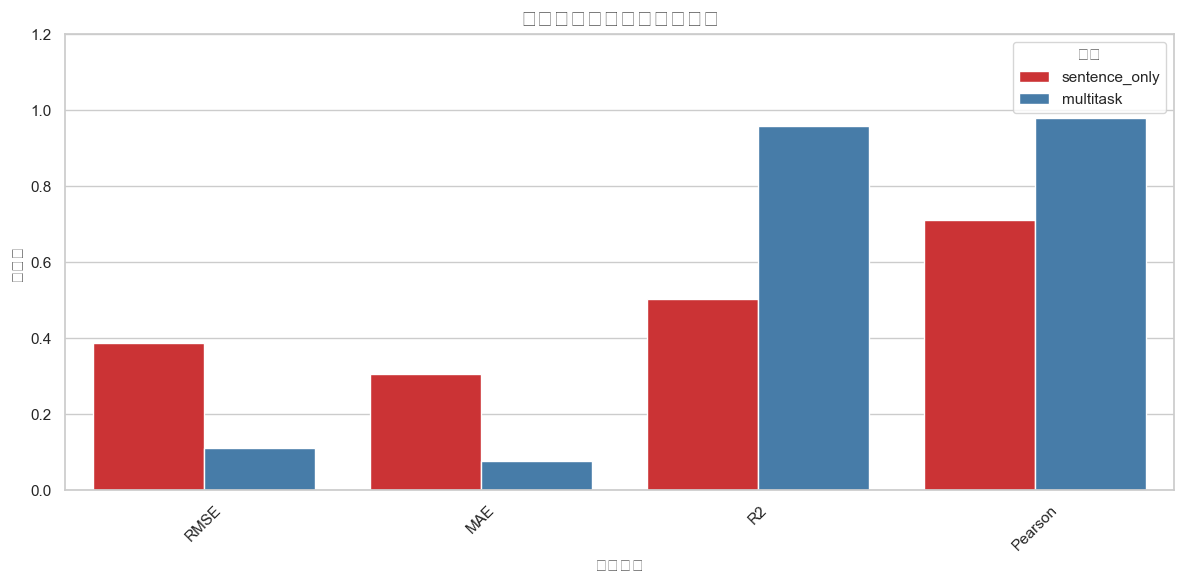

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1️⃣ 字体设置 ==========
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 读取结果文件（请确保路径正确，这里假设是 csv 文件）
input_file = '../../mid_result/model_compare/multi_or_not_index_compare.csv'  # 注意加上 .csv 后缀
df = pd.read_csv(input_file)

# 查看数据格式（调试用，可删除）
# print(df)

# 设置Seaborn的样式
sns.set(style="whitegrid")

# 创建一个长格式的数据，适合用于绘图（这一步你已经做了，保持不变）
df_melted = df.melt(id_vars=["模型"], var_name="指标", value_name="值")

# 绘制柱状图 —— 关键修改：x="指标", hue="模型"
plt.figure(figsize=(12, 6))
sns.barplot(
    x="指标",            # 横轴：指标名称
    y="值",              # 纵轴：指标值
    hue="模型",          # 不同颜色代表不同模型
    data=df_melted,
    ci=None,             # 不显示置信区间
    palette="Set1"       # 可选：设置颜色主题，让模型区分更明显
)

# 设置图表标题和标签
plt.title("不同模型在各指标上的对比", fontsize=16)
plt.xlabel("评估指标", fontsize=12)
plt.ylabel("指标值", fontsize=12)
plt.xticks(rotation=45)  # 指标名称旋转，避免重叠
plt.ylim(0, 1.2)         # 根据你的指标范围适当调整，比如 R²/Pearson 在 0~1 之间

# 添加图例
plt.legend(title="模型", loc="upper right")

# 保存图片（注意文件格式，推荐 .png 或 .pdf）
plt.tight_layout()
plt.savefig('多任务模型_按指标对比柱状图.png', dpi=300)